<a href="https://colab.research.google.com/github/abasnezhad/Kaggle/blob/main/120_years_of_Olympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dfa= pd.read_csv('athlete_events.csv')
dfr=pd.read_csv('noc_regions.csv')

In [8]:
dfa.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
146801,73687,Luigi Maiocco,M,19.0,NaN,NaN,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Gymnastics,Gymnastics Men's Team All-Around,Gold
161631,81143,Juan Manuel Molina Morote,M,29.0,173.0,67.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 20 kilometres Walk,NaN
205791,103294,Nils Rudolph,M,26.0,195.0,87.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 50 metres Freestyle,NaN


In [41]:
dfa.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.000000,102097.25,135571.0
Age,271116.0,25.556898,6.280857,10.0,22.0,25.000000,28.00,97.0
Height,271116.0,175.338970,9.278100,127.0,170.0,175.338970,180.00,226.0
Weight,271116.0,70.702393,12.574690,25.0,63.0,70.702393,75.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.000000,2002.00,2016.0


In [10]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [12]:
dfa.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [19]:
# replacing NAN with mean
dfa['Age'].fillna(dfa['Age'].mean(), inplace= True)
dfa['Height'].fillna(dfa['Height'].mean(), inplace= True)
dfa['Weight'].fillna(dfa['Weight'].mean(), inplace= True)

In [21]:
# merging 2 dfs
combined= pd.merge(dfa, dfr, on= 'NOC', how= 'left')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Gold Medals')

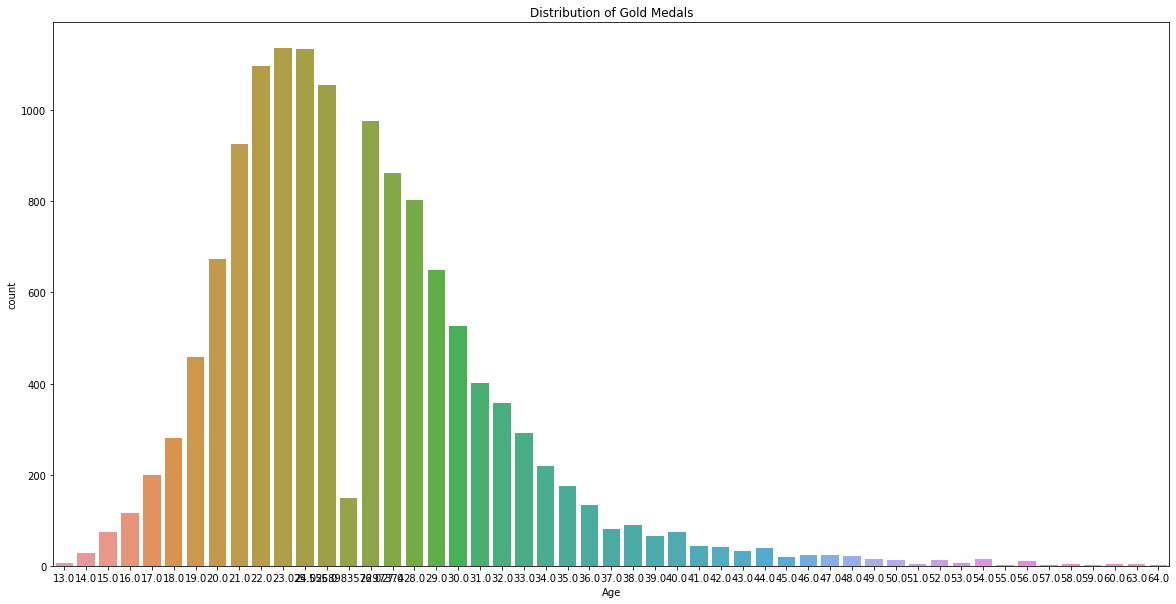

In [24]:
# gold medalists
gold_medalists= combined[combined['Medal']=='Gold']
# gold_medalists = gold_medalists[np.isfinite(goldMedals['Age'])] / non NAN age gold medalists


# gold medal destribuition  over Age 
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_medalists['Age'])
plt.title('Distribution of Gold Medals')


In [29]:
# number of gold medalists older than 50

len(gold_medalists[gold_medalists['Age']>50])
#gold_medalists['ID'][gold_medalists['Age'] > 50].count()

65

In [36]:
# sports of senior gold medalists
gold_medalists['Sport'][gold_medalists['Age']>50].value_counts()

Equestrianism       18
Sailing             12
Shooting            11
Archery             11
Art Competitions     8
Curling              2
Alpinism             1
Roque                1
Croquet              1
Name: Sport, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

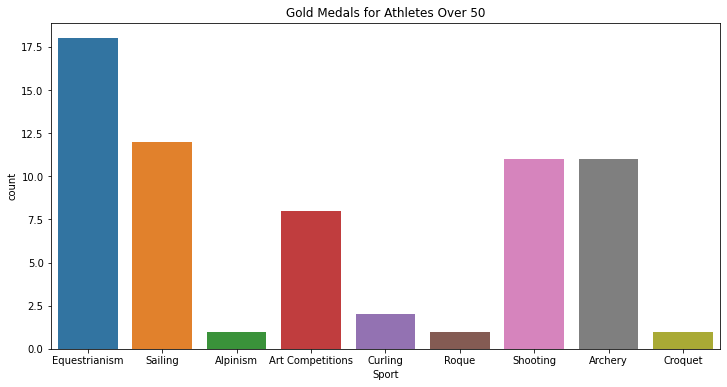

In [39]:
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(gold_medalists['Sport'][gold_medalists['Age']>50])
plt.title('Gold Medals for Athletes Over 50')

Text(0.5, 1.0, 'Women medals per edition of the Games')

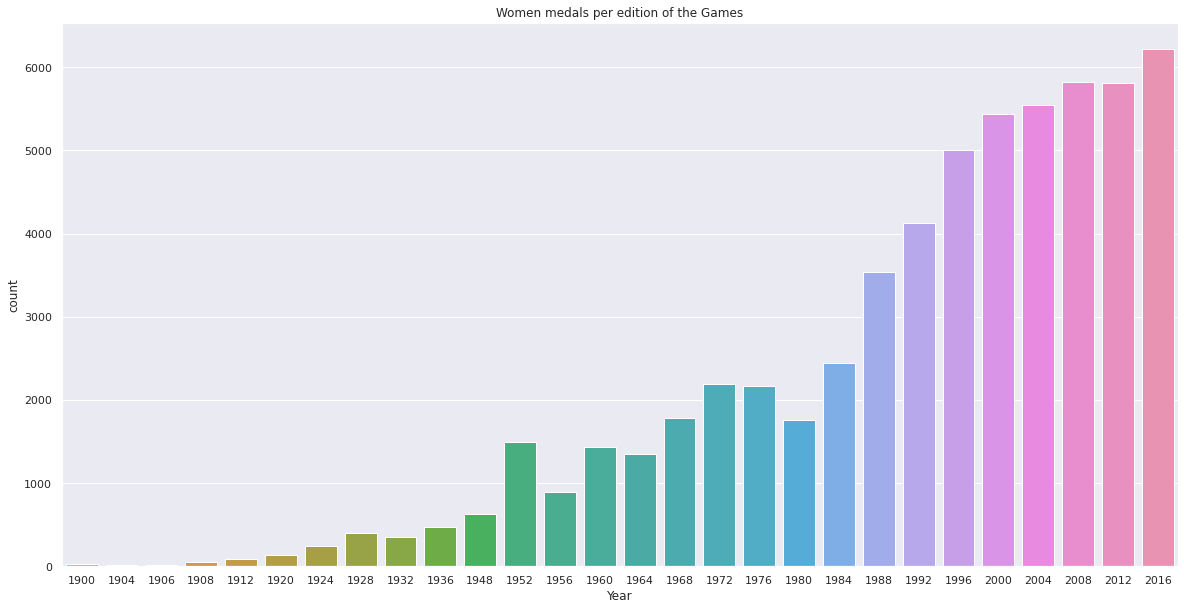

In [44]:
# women in summer olympic
women= combined[(combined['Sex']=='F') & (combined['Season']=='Summer')]

# women participation in olympic over time
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women)
plt.title('Women medals per edition of the Games')



In [42]:
combined.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')